<a href="https://colab.research.google.com/github/MohamedMohana/PV-System-Prediction/blob/main/PV_System_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import important libs for the projects

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_excel
from pandas import HDFStore
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')
import time
import pickle 
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read Dataset file

In [ ]:
file_name = '/content/drive/My Drive/"Yourdata.csv"' 
df = pd.read_csv(file_name)

#EDA

In [ ]:
df.head()

,TempOut,HiTemp,LowTemp,InTemp,OutHum,DewPt,InHum,InDew,Windspeed,WindRun,HiSpeed,WindDir,HiDir,SolarRad,SolarEnergy,HiSolarRad,Rain,RainRate,Solar_Min.,Solar_Max.,Solar Average,WindChill,HeatIndex,THWIndex,THSWIndex,Bar,UVIndex,UVDose,HiUV,HeatD-D,CoolD-D,InTemp.1,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,Arc.Int,PV Energy,Voltage,Current,Generated Power
0,16.20000,16.30000,16.10000,23.90000,65,9.60000,48,12.20000,4.50000,1.34000,6.70000,SE,SE,693,4.97000,701,0,0,741,753,746,14.60000,15.80000,14.20000,18.10000,1015.50000,4.30000,0.15000,4.30000,0.00700,0.00000,23.90000,8.95000,1.17500,0.00000,113,2,100.00000,5,0.46000,226.25000,6.03000,4080.39000
1,15.90000,16.10000,15.80000,24.10000,66,9.60000,48,12.40000,4.00000,1.21000,7.20000,SSE,SE,702,5.03000,708,0,0,748,764,756,14.70000,15.50000,14.30000,18.30000,1015.50000,4.30000,0.15000,4.40000,0.00800,0.00000,24.10000,8.94000,1.17400,0.38000,114,2,100.00000,5,0.28000,225.96000,6.08000,4108.31000
2,16.10000,16.20000,15.90000,24.20000,65,9.50000,47,12.10000,4.50000,1.34000,6.70000,SSE,SSE,709,5.08000,712,0,0,752,777,766,14.40000,15.60000,14.00000,17.90000,1015.40000,4.40000,0.16000,4.50000,0.00800,0.00000,24.20000,8.74000,1.17400,0.00000,114,2,100.00000,5,0.34000,225.89000,6.03000,4073.74000
3,16.30000,16.30000,16.20000,24.20000,63,9.20000,47,12.20000,4.90000,1.48000,7.60000,SE,SE,712,5.10000,717,0,0,765,780,773,14.30000,15.80000,13.80000,17.60000,1015.30000,4.50000,0.16000,4.60000,0.00700,0.00000,24.20000,8.74000,1.17300,0.00000,112,2,100.00000,5,0.34000,225.87000,6.07000,4100.33000
4,16.30000,16.30000,16.30000,24.30000,64,9.50000,47,12.20000,4.50000,1.34000,6.70000,SE,SE,716,5.13000,721,0,0,771,783,776,14.80000,15.90000,14.30000,18.20000,1015.20000,4.60000,0.16000,4.60000,0.00700,0.00000,24.30000,8.74000,1.17300,0.00000,114,2,100.00000,5,0.34000,225.93000,6.03000,4064.43000


In [ ]:
df.shape, df.columns

In [ ]:
#Drop unimportant CLMs
df = df.drop(['Voltage', 'Current', 'PV Energy', 'SolarEnergy'], axis=1)
df.head(5)

,TempOut,HiTemp,LowTemp,InTemp,OutHum,DewPt,InHum,InDew,Windspeed,WindRun,HiSpeed,WindDir,HiDir,SolarRad,HiSolarRad,Rain,RainRate,Solar_Min.,Solar_Max.,Solar Average,WindChill,HeatIndex,THWIndex,THSWIndex,Bar,UVIndex,UVDose,HiUV,HeatD-D,CoolD-D,InTemp.1,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,Arc.Int,Generated Power
0,16.20000,16.30000,16.10000,23.90000,65,9.60000,48,12.20000,4.50000,1.34000,6.70000,SE,SE,693,701,0,0,741,753,746,14.60000,15.80000,14.20000,18.10000,1015.50000,4.30000,0.15000,4.30000,0.00700,0.00000,23.90000,8.95000,1.17500,0.00000,113,2,100.00000,5,4080.39000
1,15.90000,16.10000,15.80000,24.10000,66,9.60000,48,12.40000,4.00000,1.21000,7.20000,SSE,SE,702,708,0,0,748,764,756,14.70000,15.50000,14.30000,18.30000,1015.50000,4.30000,0.15000,4.40000,0.00800,0.00000,24.10000,8.94000,1.17400,0.38000,114,2,100.00000,5,4108.31000
2,16.10000,16.20000,15.90000,24.20000,65,9.50000,47,12.10000,4.50000,1.34000,6.70000,SSE,SSE,709,712,0,0,752,777,766,14.40000,15.60000,14.00000,17.90000,1015.40000,4.40000,0.16000,4.50000,0.00800,0.00000,24.20000,8.74000,1.17400,0.00000,114,2,100.00000,5,4073.74000
3,16.30000,16.30000,16.20000,24.20000,63,9.20000,47,12.20000,4.90000,1.48000,7.60000,SE,SE,712,717,0,0,765,780,773,14.30000,15.80000,13.80000,17.60000,1015.30000,4.50000,0.16000,4.60000,0.00700,0.00000,24.20000,8.74000,1.17300,0.00000,112,2,100.00000,5,4100.33000
4,16.30000,16.30000,16.30000,24.30000,64,9.50000,47,12.20000,4.50000,1.34000,6.70000,SE,SE,716,721,0,0,771,783,776,14.80000,15.90000,14.30000,18.20000,1015.20000,4.60000,0.16000,4.60000,0.00700,0.00000,24.30000,8.74000,1.17300,0.00000,114,2,100.00000,5,4064.43000


In [ ]:
df.dtypes,

In [ ]:
df.shape

In [ ]:
df.count()

TempOut            5402
HiTemp             5402
LowTemp            5402
InTemp             5402
OutHum             5402
DewPt              5402
InHum              5402
InDew              5402
Windspeed          5402
WindRun            5402
HiSpeed            5402
WindDir            5402
HiDir              5402
SolarRad           5402
HiSolarRad         5402
Rain               5402
RainRate           5402
Solar_Min.         5402
Solar_Max.         5402
Solar Average      5402
WindChill          5402
HeatIndex          5402
THWIndex           5402
THSWIndex          5402
Bar                5402
UVIndex            5402
UVDose             5402
HiUV               5402
HeatD-D            5402
CoolD-D            5402
InTemp.1           5402
InEMC              5402
InAirDensity       5402
ET                 5402
WindSamp           5402
WindTx             5402
ISSRecept          5402
Arc.Int            5402
Generated Power    5402
dtype: int64

In [ ]:
print(df.isnull().sum())

TempOut            0
HiTemp             0
LowTemp            0
InTemp             0
OutHum             0
DewPt              0
InHum              0
InDew              0
Windspeed          0
WindRun            0
HiSpeed            0
WindDir            0
HiDir              0
SolarRad           0
HiSolarRad         0
Rain               0
RainRate           0
Solar_Min.         0
Solar_Max.         0
Solar Average      0
WindChill          0
HeatIndex          0
THWIndex           0
THSWIndex          0
Bar                0
UVIndex            0
UVDose             0
HiUV               0
HeatD-D            0
CoolD-D            0
InTemp.1           0
InEMC              0
InAirDensity       0
ET                 0
WindSamp           0
WindTx             0
ISSRecept          0
Arc.Int            0
Generated Power    0
dtype: int64


In [ ]:
df.describe()

,TempOut,HiTemp,LowTemp,InTemp,OutHum,DewPt,InHum,InDew,Windspeed,WindRun,HiSpeed,SolarRad,HiSolarRad,Rain,RainRate,Solar_Min.,Solar_Max.,Solar Average,WindChill,HeatIndex,THWIndex,THSWIndex,Bar,UVIndex,UVDose,HiUV,HeatD-D,CoolD-D,InTemp.1,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,Arc.Int,Generated Power
count,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000,5402.00000
mean,14.55844,14.65520,14.46468,19.79198,66.28064,7.62456,51.46946,8.75143,4.92627,1.47674,7.97155,403.19271,427.10255,0.00000,0.00000,381.41670,529.15198,456.69215,12.47995,14.04635,11.96714,14.22497,1013.74024,2.21427,0.07898,2.36492,0.01332,0.00021,19.79198,9.81116,1.19271,0.02332,113.91688,2.00000,99.98750,5.00000,2336.47108
std,2.79280,2.80168,2.78403,4.94713,17.82316,5.24817,14.96466,4.43833,2.04434,0.61119,3.08030,271.55921,274.47118,0.00000,0.00000,295.57062,328.33934,299.84552,3.10134,2.68781,2.88753,4.24319,2.63029,1.81118,0.06445,1.88807,0.00937,0.00097,4.94713,2.82849,0.02334,0.09068,0.97778,0.00000,0.53013,0.00000,1569.29464
min,2.90000,2.90000,2.80000,4.00000,10.00000,-12.40000,13.00000,-11.70000,0.00000,0.00000,0.40000,0.00000,0.00000,0.00000,0.00000,1.00000,2.00000,1.00000,0.20000,2.50000,-0.20000,-3.50000,1007.70000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,3.20000,1.15500,0.00000,86.00000,2.00000,77.50000,5.00000,0.00000
25%,12.90000,13.00000,12.90000,16.30000,59.00000,7.10000,42.00000,7.20000,3.60000,1.07000,6.30000,150.00000,176.00000,0.00000,0.00000,113.00000,232.00000,175.00000,10.40000,12.60000,10.00000,11.20000,1012.00000,0.50000,0.02000,0.60000,0.00700,0.00000,16.30000,8.01000,1.17500,0.00000,114.00000,2.00000,100.00000,5.00000,796.43500
50%,14.80000,14.90000,14.70000,20.90000,70.00000,9.40000,50.00000,10.20000,5.40000,1.61000,8.50000,392.00000,418.00000,0.00000,0.00000,307.50000,577.00000,471.00000,12.70000,14.30000,12.20000,14.70000,1013.20000,2.00000,0.07000,2.20000,0.01200,0.00000,20.90000,9.35000,1.18800,0.00000,114.00000,2.00000,100.00000,5.00000,2460.93500
75%,16.30000,16.40000,16.30000,23.60000,79.00000,11.00000,63.00000,11.60000,6.30000,1.88000,10.30000,675.75000,701.00000,0.00000,0.00000,675.00000,811.00000,743.00000,14.60000,15.80000,14.00000,17.40000,1015.40000,3.90000,0.14000,4.17500,0.01900,0.00000,23.60000,11.65000,1.20600,0.00000,114.00000,2.00000,100.00000,5.00000,3873.59000
max,21.80000,21.90000,21.80000,30.70000,95.00000,14.30000,82.00000,14.90000,10.30000,3.08000,18.80000,1070.00000,1088.00000,0.00000,0.00000,941.00000,1465.00000,986.00000,21.80000,19.90000,19.70000,24.70000,1022.20000,6.00000,0.21000,6.70000,0.05400,0.01200,30.70000,17.09000,1.27700,0.63000,115.00000,2.00000,100.00000,5.00000,5828.50000


In [ ]:
#Which colomns are non-Numeric
df.describe(include=['object'])

,WindDir,HiDir
count,5402,5402
unique,16,16
top,SSE,SSE
freq,3396,2973


In [ ]:
np.unique(df.WindDir)

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [ ]:
np.unique(df.HiDir)

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [ ]:
objectColumns = df.describe(include=['object']).columns.values
objectColumns

array(['WindDir', 'HiDir'], dtype=object)

In [ ]:
#Let's label encoder
encoder = LabelEncoder()
for col in objectColumns:  
  encoder.fit(df[col])
  df[col] = encoder.transform(df[col]) 
  print("Unique classes for {} are:  {}\n".format(col,encoder.classes_ )) 

Unique classes for WindDir are:  ['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']

Unique classes for HiDir are:  ['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']



In [ ]:
np.unique(df['WindDir'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
np.unique(df['HiDir'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
df.head()

,TempOut,HiTemp,LowTemp,InTemp,OutHum,DewPt,InHum,InDew,Windspeed,WindRun,HiSpeed,WindDir,HiDir,SolarRad,HiSolarRad,Rain,RainRate,Solar_Min.,Solar_Max.,Solar Average,WindChill,HeatIndex,THWIndex,THSWIndex,Bar,UVIndex,UVDose,HiUV,HeatD-D,CoolD-D,InTemp.1,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,Arc.Int,Generated Power
0,16.20000,16.30000,16.10000,23.90000,65,9.60000,48,12.20000,4.50000,1.34000,6.70000,9,9,693,701,0,0,741,753,746,14.60000,15.80000,14.20000,18.10000,1015.50000,4.30000,0.15000,4.30000,0.00700,0.00000,23.90000,8.95000,1.17500,0.00000,113,2,100.00000,5,4080.39000
1,15.90000,16.10000,15.80000,24.10000,66,9.60000,48,12.40000,4.00000,1.21000,7.20000,10,9,702,708,0,0,748,764,756,14.70000,15.50000,14.30000,18.30000,1015.50000,4.30000,0.15000,4.40000,0.00800,0.00000,24.10000,8.94000,1.17400,0.38000,114,2,100.00000,5,4108.31000
2,16.10000,16.20000,15.90000,24.20000,65,9.50000,47,12.10000,4.50000,1.34000,6.70000,10,10,709,712,0,0,752,777,766,14.40000,15.60000,14.00000,17.90000,1015.40000,4.40000,0.16000,4.50000,0.00800,0.00000,24.20000,8.74000,1.17400,0.00000,114,2,100.00000,5,4073.74000
3,16.30000,16.30000,16.20000,24.20000,63,9.20000,47,12.20000,4.90000,1.48000,7.60000,9,9,712,717,0,0,765,780,773,14.30000,15.80000,13.80000,17.60000,1015.30000,4.50000,0.16000,4.60000,0.00700,0.00000,24.20000,8.74000,1.17300,0.00000,112,2,100.00000,5,4100.33000
4,16.30000,16.30000,16.30000,24.30000,64,9.50000,47,12.20000,4.50000,1.34000,6.70000,9,9,716,721,0,0,771,783,776,14.80000,15.90000,14.30000,18.20000,1015.20000,4.60000,0.16000,4.60000,0.00700,0.00000,24.30000,8.74000,1.17300,0.00000,114,2,100.00000,5,4064.43000


In [ ]:
#If any columm(S), the variance = 0, then remove those variable(S)
zero_variance_columns = df.var()[df.var() == 0].index.values
zero_variance_columns

array(['Rain', 'RainRate', 'WindTx', 'Arc.Int'], dtype=object)

#Feature Selection

In [ ]:
#ALL
ALL = df[['TempOut', 'HiTemp', 'LowTemp', 'InTemp', 'OutHum', 'DewPt', 'InHum',
       'InDew', 'Windspeed', 'WindRun', 'HiSpeed', 'WindDir', 'HiDir',
       'SolarRad', 'HiSolarRad', 'Rain', 'RainRate', 'Solar_Min.',
       'Solar_Max.', 'Solar Average', 'WindChill', 'HeatIndex', 'THWIndex',
       'THSWIndex', 'Bar  ', 'UVIndex', 'UVDose', 'HiUV', 'HeatD-D', 'CoolD-D',
       'InTemp.1', 'InEMC', 'InAirDensity', 'ET ', 'WindSamp', 'WindTx',
       'ISSRecept', 'Arc.Int', 'Generated Power']]

X = ALL.drop('Generated Power', axis=1)
y = ALL[['Generated Power']]                       

In [ ]:
X.shape , y.shape

((5402, 38), (5402, 1))

**Information Gain Correlation** 

In [ ]:
from sklearn.feature_selection import mutual_info_regression


mutual_info = mutual_info_regression(X,y)
mutual_info

array([0.21781066, 0.21522769, 0.22394447, 0.26688326, 0.29385435,
       0.13503413, 0.25724575, 0.14711289, 0.05931131, 0.063821  ,
       0.07518294, 0.05780418, 0.03161432, 1.28750468, 1.27519401,
       0.00239291, 0.        , 1.139331  , 1.18311482, 1.13752971,
       0.1477173 , 0.155657  , 0.10333131, 0.31864595, 0.19087769,
       0.86528876, 0.84442366, 0.85086204, 0.17341246, 0.034663  ,
       0.26727464, 0.32909134, 0.20043494, 0.06387552, 0.00174649,
       0.        , 0.00158568, 0.        ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

IG_FS = mutual_info.sort_values(ascending=False)

#Series Pandas to DF
IG_FS = IG_FS.to_frame() 

#Indx
IG_FS.reset_index(inplace=True)

#SHift indx
IG_FS.index = IG_FS.index + 1

IG_FS.rename(columns={'index': 'Features2', 0: 'IG'}, inplace=True)

IG_FS

,Features2,IG
1,SolarRad,1.28750
2,HiSolarRad,1.27519
3,Solar_Max.,1.18311
4,Solar_Min.,1.13933
5,Solar Average,1.13753
6,UVIndex,0.86529
7,HiUV,0.85086
8,UVDose,0.84442
9,InEMC,0.32909
10,THSWIndex,0.31865


**Pearson's Correlation**


In [ ]:
PR_FS = df.corr()
PR_GP_FS = PR_FS[['Generated Power']]
PR_GP_FS = PR_GP_FS.drop('Generated Power')
PR_GP_FS = PR_GP_FS.fillna(0)
PR_GP_FS = PR_GP_FS.sort_values(['Generated Power'], ascending=False)

#Absulote Values
PR_GP_FS_ABS = PR_GP_FS.abs()
PR_GP_FS_ABS = PR_GP_FS_ABS.sort_values(['Generated Power'], ascending=False)

#Index
PR_GP_FS_ABS.reset_index(inplace=True)

#shift index
PR_GP_FS_ABS.index = PR_GP_FS_ABS.index + 1
PR_GP_FS_ABS.rename(columns={'index': 'Features1', 'Generated Power': 'Correlation'}, inplace=True)

PR_GP_FS_ABS

,Features1,Correlation
1,Solar Average,0.88219
2,SolarRad,0.87160
3,HiSolarRad,0.85315
4,UVDose,0.85014
5,UVIndex,0.84999
6,HiUV,0.81786
7,Solar_Min.,0.81732
8,Solar_Max.,0.78681
9,THSWIndex,0.56747
10,OutHum,0.41865


In [ ]:
PR_GP_FS_ABS.Features1.values

array(['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex',
       'HiUV', 'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC',
       'InHum', 'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D',
       'LowTemp', 'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex',
       'THWIndex', 'DewPt', 'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D',
       'ET ', 'WindRun', 'Windspeed', 'WindSamp', 'ISSRecept', 'InDew',
       'Arc.Int', 'WindTx', 'RainRate', 'Rain'], dtype=object)

In [ ]:
#Merge the two index together
df_index = PR_GP_FS_ABS.rename_axis('ID1').merge(IG_FS.rename_axis('ID2').reset_index(), left_on='Features1', how='left', right_on='Features2')

#Indcrease the indx
df_index.index = df_index.index + 1

#Make the index as clm
df_index['ID1'] = df_index.index


#Choose the importtant CLMS
df_index = df_index[['ID1', 'ID2']]

#Back index like usual 
df_index.index = df_index.index - 1

df_index

,ID1,ID2
0,1,5
1,2,1
2,3,2
3,4,8
4,5,6
5,6,7
6,7,4
7,8,3
8,9,10
9,10,11


In [ ]:
# ri-rj
df_index["(ID1 - ID2)"] = df_index["ID1"] - df_index["ID2"]

# (ri-rj)^2
df_index["sqr(ID1 - ID2)"] = np.square(df_index["(ID1 - ID2)"])

# (ri-rj)^2
sum_sqr_ID1_ID2 = df_index["sqr(ID1 - ID2)"].sum()

df_index
sum_sqr_ID1_ID2

376

In [ ]:
1-(6*(378)/(38*(38**2-1)))

0.9586388007440639

In [ ]:
r = df_index[['ID1']]
r_dash = df_index[['ID2']]

In [ ]:
scipy.stats.spearmanr(r, r_dash)

SpearmanrResult(correlation=0.9588576430681693, pvalue=2.826698403750984e-21)

In [ ]:
scipy.stats.stats.spearmanr(r, r_dash)[0]

0.9588576430681693

In [ ]:
r_dash

,ID2
0,5
1,1
2,2
3,8
4,6
5,7
6,4
7,3
8,10
9,11



****************How to determine Spearman's correlation in Python*****************

   x  y
0  1  5
1  2  1
2  3  2
3  4  8
4  5  6

spearmans_rank_correlation is:  0.9588576430681692
Scipy spearmans_rank_correlation is:  0.9588576430681693


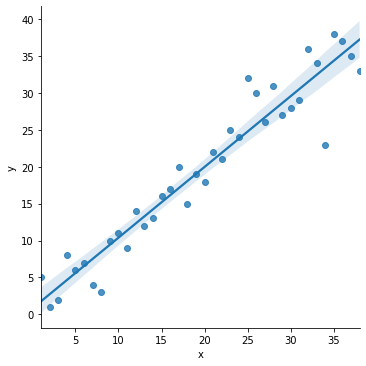

In [ ]:
## Spearman's correlation
def Snippet_121(): 
    print()
    print(format('How to determine Spearman\'s correlation in Python','*^82'))    
    import warnings
    warnings.filterwarnings("ignore")
    # load libraries
    import matplotlib.pyplot as plt    
    import scipy.stats
    import pandas as pd
    import random
    import seaborn as sns
    # Create empty dataframe
    df = pd.DataFrame()
    # Add columns
    df['x'] = r['ID1']
    df['y'] = r_dash['ID2']
    # View first few rows of data
    print(); print(df.head())
    # Calculate Pearson’s Correlation Coefficient
    def spearmans_rank_correlation(xs, ys):
        # Calculate the rank of x's
        xranks = pd.Series(xs).rank()
        # Caclulate the ranking of the y's
        yranks = pd.Series(ys).rank()
        # Calculate Pearson's correlation coefficient on the ranked versions of the data
        return scipy.stats.pearsonr(xranks, yranks)
    # Show Pearson's Correlation Coefficient
    result = spearmans_rank_correlation(df.x, df.y)[0]
    print()
    print("spearmans_rank_correlation is: ", result)
    # Calculate Spearman’s Correlation Using SciPy
    print("Scipy spearmans_rank_correlation is: ", scipy.stats.spearmanr(df.x, df.y)[0])
    # reg plot
    sns.lmplot('x', 'y', data=df, fit_reg=True)
    plt.show()    
Snippet_121()

#Extract the features

In [ ]:
#Ambient Temp Sensor (Ta)
Ta= df[['TempOut',	'HiTemp',	'LowTemp',	'InTemp', 'Generated Power']]

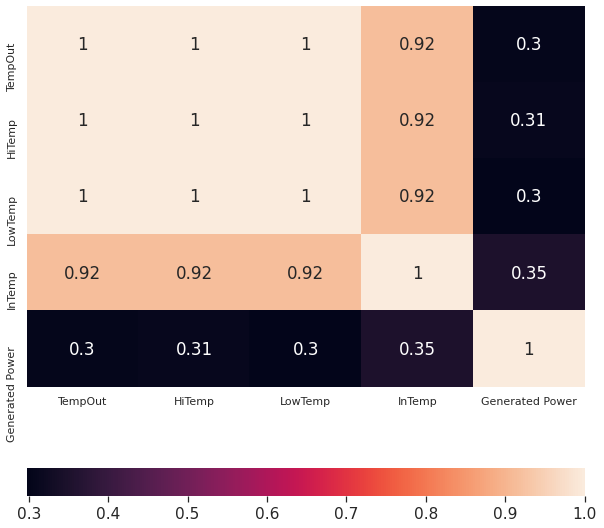

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(Ta.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
#Relative Humidity Sensor (RH)
RH = df[['OutHum',	'DewPt',	'InHum',	'InDew',	'Generated Power']]

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(RH.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
#Wind Speed Sensor (W)
W = df[['Windspeed',	'WindRun',	'HiSpeed',	'Generated Power']]

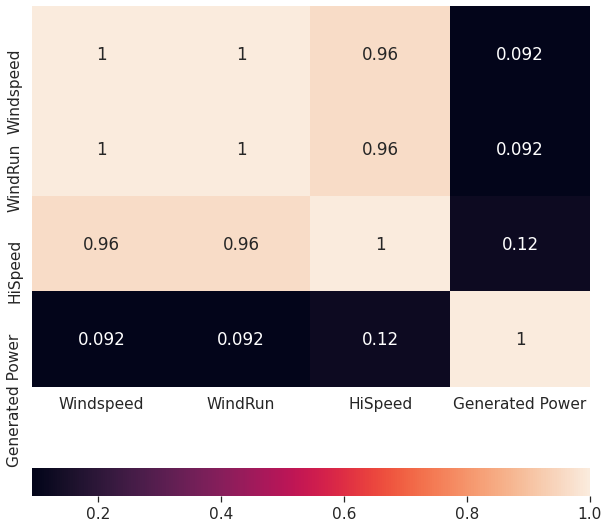

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(W.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
#Wind Direction Sensor (WD)
WD = df[['WindDir',	'HiDir', 'Generated Power']]
#.astype('str') 

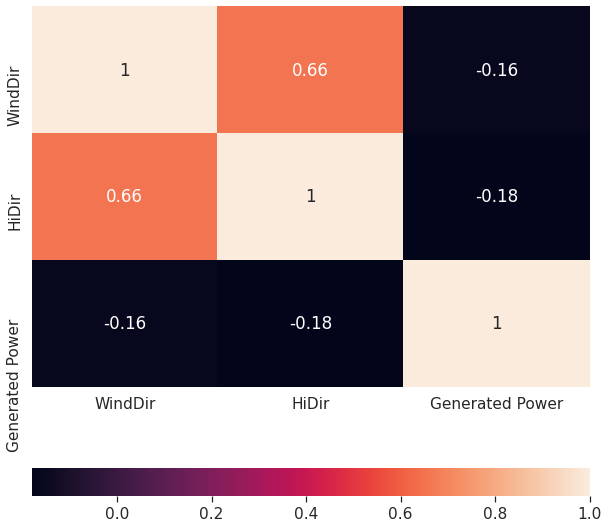

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(WD.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
#Solar Irradiation Sensor (SR)
SR = df[['SolarRad',	'SolarEnergy',	'HiSolarRad', 'Generated Power']]

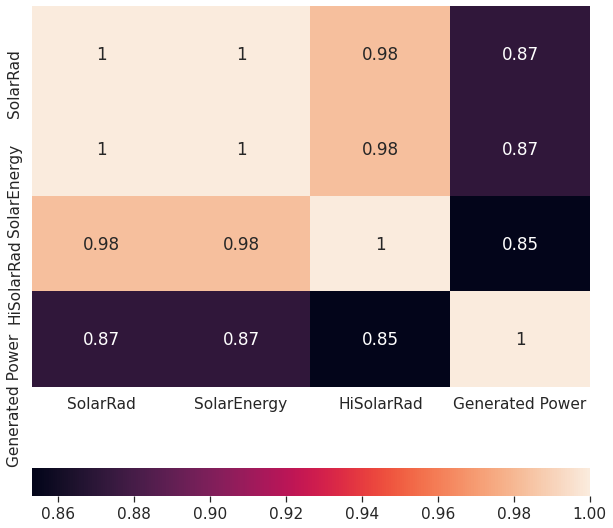

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(SR.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
#Precipitation Sensor (R)
R = df[['Rain', 'RainRate', 'Generated Power']]

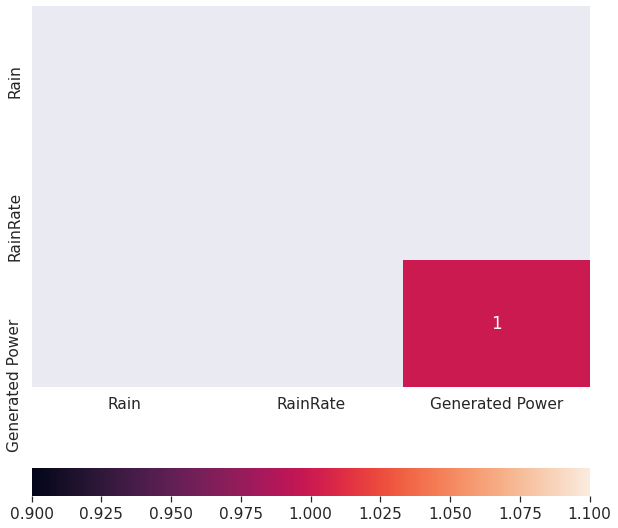

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(R.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
#PYRONOMETER (P) .. .. . . .
P = df[['Solar_Min.',	'Solar_Max.',	'Solar Average',	'Generated Power']]

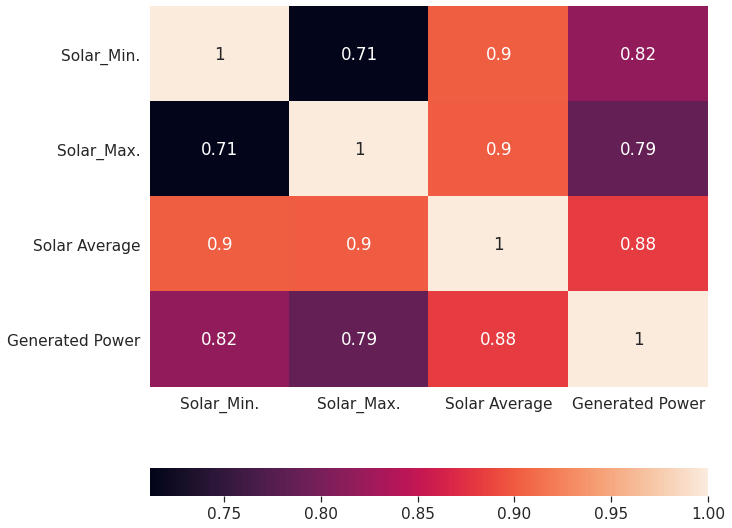

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(P.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
#Calculated Parameters From Weather Station & Pyronometer Sensor data(CP)
CP = df[['WindChill',	'HeatIndex', 'THWIndex', 'THSWIndex', 'Bar  ', 'UVIndex',
         'UVDose', 'HiUV', 'HeatD-D', 'CoolD-D', 'InTemp', 'InEMC',	
         'InAirDensity', 'ET ', 'WindSamp', 'WindTx', 'ISSRecept', 'Arc.Int',
         'Generated Power']]

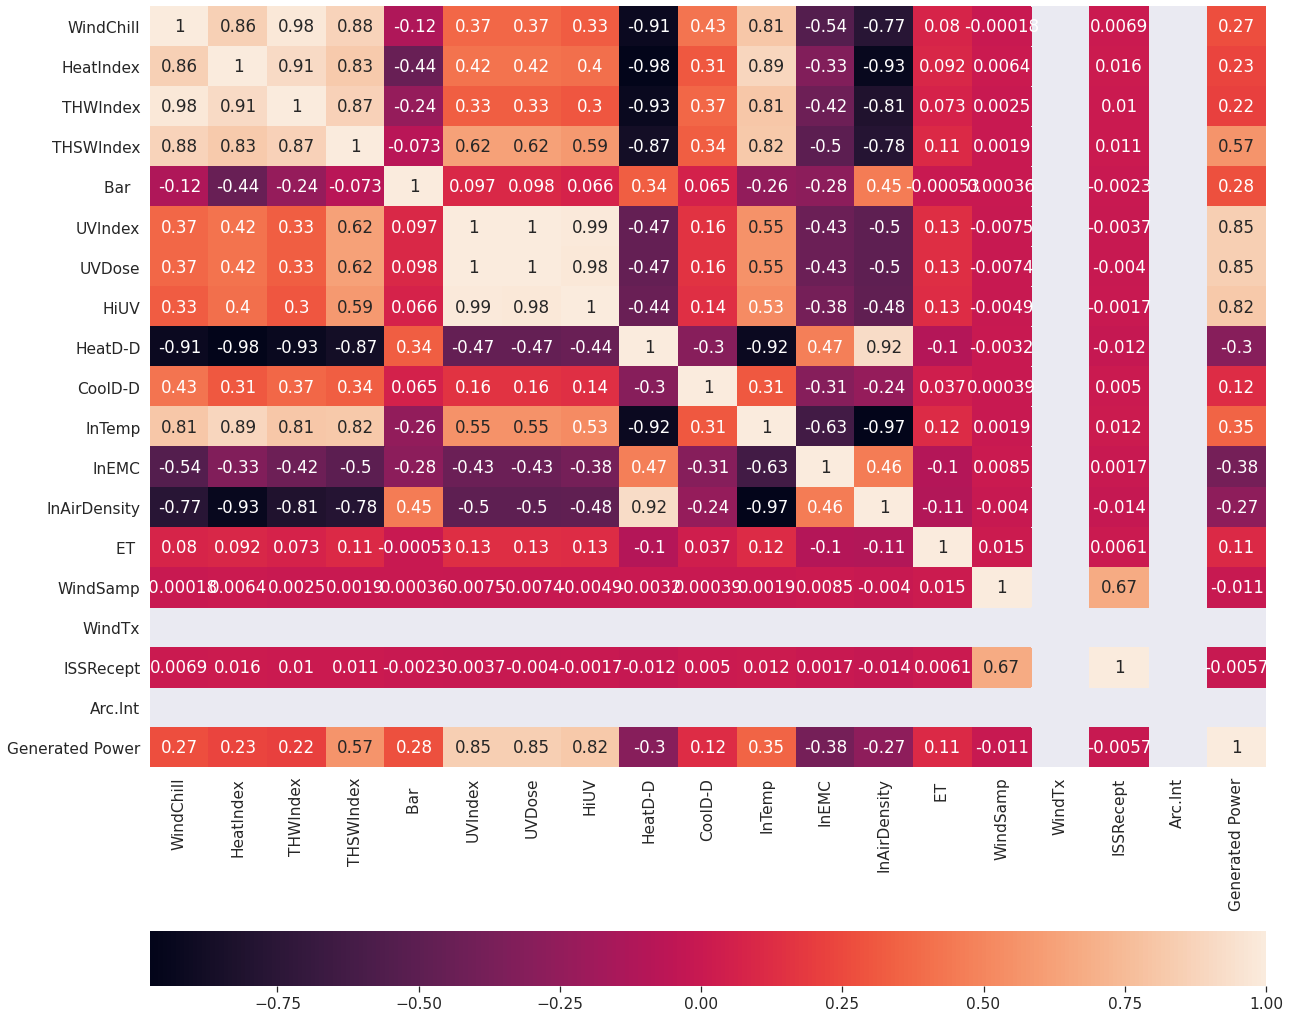

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale=1.4)
sns.heatmap(CP.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

In [ ]:
#PV Inverter (N)
N = df[['PV Energy',	'Voltage',	'Current',	'Generated Power']]

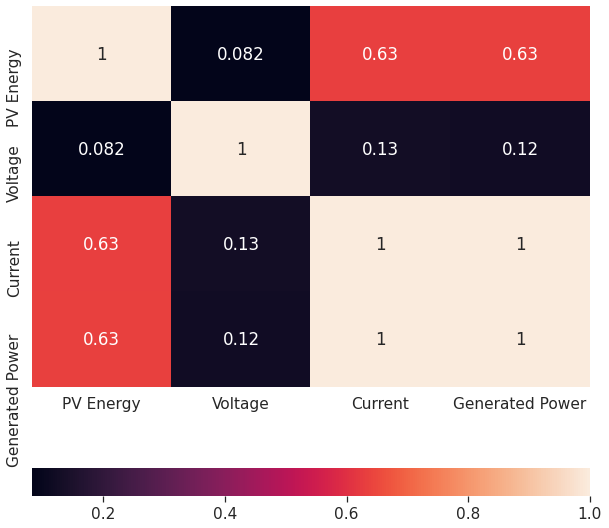

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(N.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )

#Backword Elimination

In [ ]:
#Arrange the feature
Person_Corr = df[['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex',
          'HiUV', 'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC',
          'InHum', 'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D',
          'LowTemp', 'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex',
          'THWIndex', 'DewPt', 'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D',
          'ET ', 'WindRun', 'Windspeed', 'WindSamp', 'ISSRecept', 'InDew',
          'Arc.Int', 'WindTx', 'RainRate', 'Rain',
          'Generated Power']]

#Scale the data
X = Person_Corr.drop('Generated Power', axis=1)
X.loc[:, 'dummy'] = '0'

y = Person_Corr[['Generated Power']]

X = X.to_numpy()
y = y.to_numpy()

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X.shape, y.shape
type(X), type(y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

type(X), type(y)


KF = KFold(n_splits=10,shuffle=True, random_state=100)

resLASSO = []
resLR = []
resPR = []
resRF = []
resXGBOOST = []
resSVM = []
resNN = []


i = 1
a = 1
f = 38



while len(X.columns) > 0:
  X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)
  print('-------------','EXP',a,'START','-------------')
  print(X.columns)



  for train_index, test_index in KF.split(X,y, groups=None):
    X_train,X_test,y_train,y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    exec("X_test{itr} = X_test".format(itr=i))
    exec("y_test{itr} = y_test".format(itr=i))
    
    X_train = pd.DataFrame(data = X_train)
    y_train = pd.DataFrame(data = y_train)
    X_test = pd.DataFrame(data = X_test)
    y_test = pd.DataFrame(data = y_test)

    #LASSO Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'LASSO', ':  ', now)
    LASSO = linear_model.Lasso(alpha=0.0001)
    %time LASSO.fit(X_train, y_train)
    %time predLASSO = LASSO.predict(X_test)
    print('Mean Squared Error is :', mean_squared_error(y_test, predLASSO))
    resLASSO.append(mean_squared_error(y_test, predLASSO))
    exec("predLASSO{itr} = predLASSO".format(itr=i))
    print('\n')
 
    #Liear Regresion Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'LR', ':  ', now)
    LR = linear_model.LinearRegression()
    %time LR.fit(X_train, y_train)
    %time predLR = LR.predict(X_test)
    print('Mean Squared Error is :', mean_squared_error(y_test, predLR))
    resLR.append(mean_squared_error(y_test, predLR))
    exec("predLR{itr} = predLR".format(itr=i))
    print('\n')

    #Polynoinal Regresion Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'PR', ':  ', now)
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(X_train)
    PR = LinearRegression()
    %time PR.fit(x_poly, y_train)
    %time predPR = PR.predict(x_poly)
    print('Mean Squared Error is :', mean_squared_error(y_train, predPR))
    resPR.append(mean_squared_error(y_train, predPR))
    exec("predPR{itr} = predPR".format(itr=i))
    print('\n')

    #Random Forest Model 
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'RF', ':  ', now)
    RF = RandomForestRegressor()
    %time RF.fit(X_train, y_train)
    %time predRF = RF.predict(X_test)
    print('Mean Squared Error is :', mean_squared_error(y_test, predRF))
    resRF.append(mean_squared_error(y_test, predRF))
    exec("predRF{itr} = predRF".format(itr=i))
    print('\n')

    #XGboost Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'XGBOOST', ':  ', now)
    XGBOOST = xgb.XGBRegressor(objective='reg:linear', learning_rate=0.1)
    %time XGBOOST.fit(X_train, y_train)
    %time predXGBOOST = XGBOOST.predict(X_test)
    print('Mean Squared Error is :', mean_squared_error(y_test, predXGBOOST))
    resXGBOOST.append(mean_squared_error(y_test, predXGBOOST))
    exec("predXGBOOST{itr} = predXGBOOST".format(itr=i))
    print('\n')

    #SVM Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'SVM', ':  ', now)
    SVM = SVR(kernel='rbf')
    %time SVM.fit(X_train, y_train)
    %time predSVM = SVM.predict(X_test)
    print('Mean Squared Error is :', mean_squared_error(y_test, predSVM))
    resSVM.append(mean_squared_error(y_test, predSVM))
    exec("predSVM{itr} = predSVM".format(itr=i))
    print('\n')
    
    #NN
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'NN', ':  ', now)
    # NN = MLPRegressor(hidden_layer_sizes = (1200,500,),
    #                   activation='relu',solver='adam',
    #                   alpha=0.0001,max_iter=500)  
    NN = MLPRegressor(hidden_layer_sizes=(1200,500,),
                    activation='relu', solver='adam',
                    alpha=0.0001,
                    shuffle=False, random_state=42, 
                    max_iter=20000, momentum=0.7, early_stopping=True, 
                    validation_fraction=0.15)
    %time NN.fit(X_train, y_train)
    %time predNN = NN.predict(X_test)
    print('Mean Squared Error is :', mean_squared_error(y_test, predNN))
    resNN.append(mean_squared_error(y_test, predNN))
    exec("predNN{itr} = predNN".format(itr=i))
    print('\n')


    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i ,'--', now)

    #Save the results 
    RES = pd.DataFrame(data={"resLASSO": resLASSO,
                             "resLR": resLR,
                             "resPR": resPR,
                             "resRF": resRF,
                             "resXGBOOST": resXGBOOST,
                             "resSVM": resSVM,
                             "resNN": resNN
                             })
    #RES = RES.mean().round(2)
    RES.loc['mean'] = RES.mean().round(2)
    RES.to_csv(f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Results/RES_{f}.csv", sep=',',index=False)

    #Save the model
    joblib.dump(LASSO, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/LASSO_{f}.pkl")
    joblib.dump(LR, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/LR_{f}.pkl")
    joblib.dump(PR, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/PR_{f}.pkl")
    joblib.dump(RF, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/RF_{f}.pkl")
    joblib.dump(XGBOOST, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/XGBOOST_{f}.pkl")
    joblib.dump(SVM, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/SVM{f}.pkl")
    joblib.dump(NN, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/NN{f}.pkl")


    
  resLASSO = []
  resLR = []
  resPR = []
  resRF = []
  resXGBOOST = []
  resSVM = []
  resNN = []

   


  i = i+1
  a = a+1
  f = f-1


  if len(X.columns) == 1:
    break


Streaming output truncated to the last 5000 lines.
Wall time: 1.69 ms
Mean Squared Error is : 0.19961548600862167


30 -- LR :   14:58:53 - 02/15/21
CPU times: user 0 ns, sys: 19.3 ms, total: 19.3 ms
Wall time: 5.41 ms
CPU times: user 6.84 ms, sys: 0 ns, total: 6.84 ms
Wall time: 1.96 ms
Mean Squared Error is : 0.19981000148615563


30 -- PR :   14:58:53 - 02/15/21
CPU times: user 20.1 ms, sys: 29.4 ms, total: 49.6 ms
Wall time: 12.9 ms
CPU times: user 8.43 ms, sys: 20.5 ms, total: 28.9 ms
Wall time: 7.3 ms
Mean Squared Error is : 0.14954812842992912


30 -- RF :   14:58:54 - 02/15/21
CPU times: user 2.85 s, sys: 303 ms, total: 3.15 s
Wall time: 2.86 s
CPU times: user 25.2 ms, sys: 0 ns, total: 25.2 ms
Wall time: 24.9 ms
Mean Squared Error is : 0.11807464519842913


30 -- XGBOOST :   14:58:56 - 02/15/21
[14:58:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 255 ms, sys: 0 ns, total: 255 ms
Wall time

In [ ]:
# and later...
my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Results")


extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f).tail(1) for f in all_filenames])
#export to csv
combined_csv.to_csv( "combined_csv1.csv", index=False, encoding='utf-8-sig')

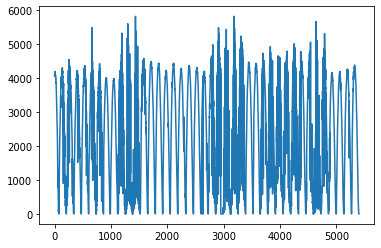

In [ ]:
#Arrange the feature
Person_Corr = df[['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex',
          'HiUV', 'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC',
          'InHum', 'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D',
          'LowTemp', 'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex',
          'THWIndex', 'DewPt', 'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D',
          'ET ', 'WindRun', 'Windspeed', 'WindSamp', 'ISSRecept', 'InDew',
          'Arc.Int', 'WindTx', 'RainRate', 'Rain',
          'Generated Power']]

#Scale the data
X = Person_Corr.drop('Generated Power', axis=1)

y = Person_Corr[['Generated Power']]

# X = X.to_numpy()
# y = y.to_numpy()

# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

# X.shape, y.shape
# type(X), type(y)

# X = pd.DataFrame(X)
# y = pd.DataFrame(y)

# type(X), type(y)



from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(y)

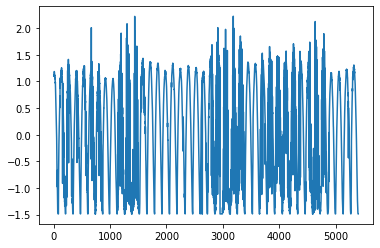

In [ ]:
#Arrange the feature
Person_Corr = df[['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex',
          'HiUV', 'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC',
          'InHum', 'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D',
          'LowTemp', 'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex',
          'THWIndex', 'DewPt', 'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D',
          'ET ', 'WindRun', 'Windspeed', 'WindSamp', 'ISSRecept', 'InDew',
          'Arc.Int', 'WindTx', 'RainRate', 'Rain',
          'Generated Power']]

#Scale the data
X = Person_Corr.drop('Generated Power', axis=1)

y = Person_Corr[['Generated Power']]

X = X.to_numpy()
y = y.to_numpy()

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X.shape, y.shape
type(X), type(y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

type(X), type(y)



from __future__ import division
import numpy as np
import matplotlib.pyplot as plt



plt.plot(y)

In [ ]:
#Arrange the feature
Person_Corr = df[['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex',
          'HiUV', 'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC',
          'InHum', 'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D',
          'LowTemp', 'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex',
          'THWIndex', 'DewPt', 'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D',
          'ET ', 'WindRun', 'Windspeed', 'WindSamp', 'ISSRecept', 'InDew',
          'Arc.Int', 'WindTx', 'RainRate', 'Rain',
          'Generated Power']]

#Scale the data
X = Person_Corr.drop('Generated Power', axis=1)

y = Person_Corr[['Generated Power']]

X = X.to_numpy()
y = y.to_numpy()

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X.shape, y.shape
type(X), type(y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

type(X), type(y)


KF = KFold(n_splits=10,shuffle=False, random_state=100)
resPR = []
i = 1

for train_index, test_index in KF.split(X,y, groups=None):
  X_train,X_test,y_train,y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
  exec("X_test{itr} = X_test".format(itr=i))
  exec("y_test{itr} = y_test".format(itr=i))
  
  X_train = pd.DataFrame(data = X_train)
  y_train = pd.DataFrame(data = y_train)
  X_test = pd.DataFrame(data = X_test)
  y_test = pd.DataFrame(data = y_test)

  #Polynoinal Regresion Model
  now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
  print(i,'--', 'PR', ':  ', now)
  polynomial_features= PolynomialFeatures(degree=2)
  x_poly = polynomial_features.fit_transform(X_train)
  PR = LinearRegression()
  %time PR.fit(x_poly, y_train)
  %time predPR = PR.predict(x_poly)
  print('y_train =', y_train)
  print('y_Pred=', predPR)
  print('Mean Squared Error is :', mean_squared_error(y_train, predPR))
  resPR.append(mean_squared_error(y_train, predPR))
  exec("predPR{itr} = predPR".format(itr=i))
  print('\n')

  now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
  print(i ,'--', now)

i = i+1



1 -- PR :   07:24:13 - 10/12/21
CPU times: user 1.02 s, sys: 334 ms, total: 1.35 s
Wall time: 419 ms
CPU times: user 12.9 ms, sys: 34.4 ms, total: 47.4 ms
Wall time: 12.6 ms
y_train =             0
541   0.94145
542   1.28681
543   1.29359
544   1.21096
545   1.16562
...       ...
5397 -1.47099
5398 -1.48582
5399 -1.48900
5400 -1.48900
5401 -1.48900

[4861 rows x 1 columns]
y_Pred= [[ 1.02765976]
 [ 0.74749785]
 [ 1.10298851]
 ...
 [-1.63311715]
 [-1.54588079]
 [-1.4195762 ]]
Mean Squared Error is : 0.10150116498973648


1 -- 07:24:14 - 10/12/21
1 -- PR :   07:24:14 - 10/12/21
CPU times: user 1.02 s, sys: 526 ms, total: 1.54 s
Wall time: 391 ms
CPU times: user 7.21 ms, sys: 9.87 ms, total: 17.1 ms
Wall time: 4.78 ms
y_train =             0
0     1.11138
1     1.12917
2     1.10714
3     1.12409
4     1.10121
...       ...
5397 -1.47099
5398 -1.48582
5399 -1.48900
5400 -1.48900
5401 -1.48900

[4861 rows x 1 columns]
y_Pred= [[ 0.97609167]
 [ 0.93784776]
 [ 1.07474041]
 ...
 [-1.63469318

In [ ]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
type(predPR)

numpy.ndarray

In [ ]:
Actual = pd.DataFrame(y_train)
Pred = pd.DataFrame(predPR)

In [ ]:
#Inverse
Actual_inv = pd.DataFrame(sc_y.inverse_transform(y_train))
Pred_inv = pd.DataFrame(sc_y.inverse_transform(predPR))

In [ ]:
sc_y.inverse_transform(predPR)

array([[3863.67644253],
       [3731.32506792],
       [3989.29095269],
       ...,
       [-101.00560359],
       [  54.74325759],
       [-132.05241955]])

In [ ]:
Pred

,0
0,0.97327
1,0.88892
2,1.05332
3,1.00021
4,0.99661
...,...
4857,-1.59816
4858,-1.46601
4859,-1.55337
4860,-1.45412


In [ ]:
Actual

,0
0,1.11138
1,1.12917
2,1.10714
3,1.12409
4,1.10121
...,...
4857,-1.46463
4858,-1.48074
4859,-1.48836
4860,-1.48900


In [ ]:

#Save the results 


Actual_inv.to_csv("/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Results/Actual_inv.csv", sep=',',index=False)
Pred_inv.to_csv("/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Results/Pred_inv.csv", sep=',',index=False)



In [ ]:

#Save the results 


Actual.to_csv("/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Results/Actual.csv", sep=',',index=False)
Pred.to_csv("/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Results/Pred.csv", sep=',',index=False)


In [ ]:
#Arrange the feature
Person_Corr = df[['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex',
          'HiUV', 'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC',
          'InHum', 'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D',
          'LowTemp', 'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex',
          'THWIndex', 'DewPt', 'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D',
          'ET ', 'WindRun', 'Windspeed', 'WindSamp', 'ISSRecept', 'InDew',
          'Arc.Int', 'WindTx', 'RainRate', 'Rain',
          'Generated Power']]

#Scale the data
X = Person_Corr.drop('Generated Power', axis=1)

y = Person_Corr[['Generated Power']]

X = X.to_numpy()
y = y.to_numpy()

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X.shape, y.shape
type(X), type(y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [ ]:
y.describe()

,0
count,5402.00000
mean,0.00000
std,1.00009
min,-1.48900
25%,-0.98145
50%,0.07932
75%,0.97959
max,2.22543


#MAPE

In [ ]:
from sklearn.metrics import mean_absolute_error


Y_actual = [1,2,3,4,5]
Y_Predicted = [1,2.5,3,4.1,4.9]

mape = mean_absolute_error(Y_actual, Y_Predicted) * 100
print(mape)

13.999999999999984


In [ ]:
import numpy as np

def MAPE(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true)) ) ) *100



Y_actual = [1,2,3,4,5]
Y_Predicted = [1,2.5,3,4.1,4.9]

MAPE(Y_actual, Y_Predicted)

5.899999999999996

In [ ]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Y_actual = [1,2,3,4,5]
Y_Predicted = [1,2.5,3,4.1,4.9]

MAPE(Y_actual, Y_Predicted)


5.899999999999996

In [ ]:
np.ones(5))

array([1., 1., 1., 1., 1.])

In [ ]:
np.maximum(np.ones(5), np.abs([1,2,3,4,5]))

array([1., 2., 3., 4., 5.])

In [ ]:
#Arrange the feature
Person_Corr = df[['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex',
          'HiUV', 'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC',
          'InHum', 'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D',
          'LowTemp', 'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex',
          'THWIndex', 'DewPt', 'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D',
          'ET ', 'WindRun', 'Windspeed', 'WindSamp', 'ISSRecept', 'InDew',
          'Arc.Int', 'WindTx', 'RainRate', 'Rain',
          'Generated Power']]

#Scale the data
X = Person_Corr.drop('Generated Power', axis=1)
X.loc[:, 'dummy'] = '0'

y = Person_Corr[['Generated Power']]

#X = X.to_numpy()
#y = y.to_numpy()

# f_transformer = StandardScaler()
# pwr_transformer = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
f_transformer = MinMaxScaler()
pwr_transformer = MinMaxScaler()


# from sklearn.preprocessing import RobustScaler
# f_transformer = RobustScaler()
# pwr_transformer = RobustScaler()





#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

#X.shape, y.shape
#type(X), type(y)

#X = pd.DataFrame(X)
#y = pd.DataFrame(y)

#type(X), type(y)




KF = KFold(n_splits=10,shuffle=True, random_state=100)

resLASSO = []
resLR = []
resPR = []
resRF = []
resXGBOOST = []
resSVM = []
resNN = []


i = 1
a = 1
f = 38



while len(X.columns) > 0:
  X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)
  print('-------------','EXP',a,'START','-------------')
  print(X.columns)



  for train_index, test_index in KF.split(X,y, groups=None):
    X_train,X_test,y_train,y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    exec("X_test{itr} = X_test".format(itr=i))
    exec("y_test{itr} = y_test".format(itr=i))

    #Fit and Transform on the Train data
    f_transformer_fit_train = f_transformer.fit_transform(X_train.to_numpy())
    pwr_transformer_fit_train = pwr_transformer.fit_transform(y_train)


    #Transform the test data
    f_transformer_test = f_transformer.transform(X_test.to_numpy())
    pwr_transformer_test = pwr_transformer.transform(y_test)
    

    X_train = pd.DataFrame(data = f_transformer_fit_train)
    y_train = pd.DataFrame(data = pwr_transformer_fit_train)
    X_test = pd.DataFrame(data = f_transformer_test)
    y_test = pd.DataFrame(data = pwr_transformer_test)



    #LASSO Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'LASSO', ':  ', now)
    LASSO = linear_model.Lasso(alpha=0.0001)
    %time LASSO.fit(X_train, y_train)
    %time predLASSO = LASSO.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predLASSO))
    resLASSO.append(MAPE(y_test, predLASSO))
    exec("predLASSO{itr} = predLASSO".format(itr=i))
    print('\n')
 
    #Liear Regresion Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'LR', ':  ', now)
    LR = linear_model.LinearRegression()
    %time LR.fit(X_train, y_train)
    %time predLR = LR.predict(X_test) #y_pred, then later to show the true numbers pwr_transformer.inverse_transform(predLR)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predLR))
    resLR.append(MAPE(y_test, predLR))
    exec("predLR{itr} = predLR".format(itr=i))
    print('\n')

    #Polynoinal Regresion Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'PR', ':  ', now)
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(X_train)
    PR = LinearRegression()
    %time PR.fit(x_poly, y_train)
    %time predPR = PR.predict(x_poly)
    print('Mean Absolute Percentage Error is :', MAPE(y_train, predPR))
    resPR.append(MAPE(y_train, predPR))
    exec("predPR{itr} = predPR".format(itr=i))
    print('\n')
    

    #Random Forest Model 
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'RF', ':  ', now)
    RF = RandomForestRegressor()
    %time RF.fit(X_train, y_train)
    %time predRF = RF.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predRF))
    resRF.append(MAPE(y_test, predRF))
    exec("predRF{itr} = predRF".format(itr=i))
    print('\n')

    #XGboost Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'XGBOOST', ':  ', now)
    XGBOOST = xgb.XGBRegressor(objective='reg:linear', learning_rate=0.1)
    %time XGBOOST.fit(X_train, y_train)
    %time predXGBOOST = XGBOOST.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predXGBOOST))
    resXGBOOST.append(MAPE(y_test, predXGBOOST))
    exec("predXGBOOST{itr} = predXGBOOST".format(itr=i))
    print('\n')

    #SVM Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'SVM', ':  ', now)
    SVM = SVR(kernel='rbf')
    %time SVM.fit(X_train, y_train)
    %time predSVM = SVM.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predSVM))
    resSVM.append(MAPE(y_test, predSVM))
    exec("predSVM{itr} = predSVM".format(itr=i))
    print('\n')
    
    #NN
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'NN', ':  ', now)
    # NN = MLPRegressor(hidden_layer_sizes = (1200,500,),
    #                   activation='relu',solver='adam',
    #                   alpha=0.0001,max_iter=500)  
    NN = MLPRegressor(hidden_layer_sizes=(1200,500,),
                    activation='relu', solver='adam',
                    alpha=0.0001,
                    shuffle=False, random_state=42, 
                    max_iter=20000, momentum=0.7, early_stopping=True, 
                    validation_fraction=0.15)
    %time NN.fit(X_train, y_train)
    %time predNN = NN.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predNN))
    resNN.append(MAPE(y_test, predNN))
    exec("predNN{itr} = predNN".format(itr=i))
    print('\n')


    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i ,'--', now)

    #Save the results 
    RES = pd.DataFrame(data={"resLASSO": resLASSO,
                             "resLR": resLR,
                             "resPR": resPR,
                             "resRF": resRF,
                             "resXGBOOST": resXGBOOST,
                             "resSVM": resSVM,
                             "resNN": resNN
                             })
    #RES = RES.mean().round(2)
    RES.loc['mean'] = RES.mean().round(2)
    RES.to_csv(f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Results_MAPE/RES_{f}.csv", sep=',',index=False)

    # #Save the model
    # joblib.dump(LASSO, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/LASSO_{f}.pkl")
    # joblib.dump(LR, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/LR_{f}.pkl")
    # joblib.dump(PR, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/PR_{f}.pkl")
    # joblib.dump(RF, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/RF_{f}.pkl")
    # joblib.dump(XGBOOST, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/XGBOOST_{f}.pkl")
    # joblib.dump(SVM, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/SVM{f}.pkl")
    # joblib.dump(NN, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/NN{f}.pkl")


    
  resLASSO = []
  resLR = []
  resPR = []
  resRF = []
  resXGBOOST = []
  resSVM = []
  resNN = []

   


  i = i+1
  a = a+1
  f = f-1


  if len(X.columns) == 1:
    break


------------- EXP 1 START -------------
Index(['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex', 'HiUV',
       'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC', 'InHum',
       'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D', 'LowTemp',
       'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex', 'THWIndex', 'DewPt',
       'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D', 'ET ', 'WindRun', 'Windspeed',
       'WindSamp', 'ISSRecept', 'InDew', 'Arc.Int', 'WindTx', 'RainRate',
       'Rain'],
      dtype='object')
1 -- LASSO :   10:08:57 - 09/28/21
CPU times: user 212 ms, sys: 300 ms, total: 512 ms
Wall time: 151 ms
CPU times: user 2.29 ms, sys: 5.54 ms, total: 7.84 ms
Wall time: 2.12 ms
Mean Absolute Percentage Error is : 29.400895134165054


1 -- LR :   10:08:58 - 09/28/21
CPU times: user 21.4 ms, sys: 43.6 ms, total: 65 ms
Wall time: 16.7 ms
CPU times: user 2.45 ms, sys: 18.2 ms, total: 20.7 ms
Wall time: 5.2 ms
Mean Absolute Percentage Error is : 6.699466676146978

KeyboardInterrupt: ignored

In [ ]:
#Arrange the feature
Person_Corr = df[['Solar Average', 'SolarRad', 'HiSolarRad', 'UVDose', 'UVIndex',
          'HiUV', 'Solar_Min.', 'Solar_Max.', 'THSWIndex', 'OutHum', 'InEMC',
          'InHum', 'InTemp', 'InTemp.1', 'HiTemp', 'TempOut', 'HeatD-D',
          'LowTemp', 'Bar  ', 'InAirDensity', 'WindChill', 'HeatIndex',
          'THWIndex', 'DewPt', 'HiDir', 'WindDir', 'HiSpeed', 'CoolD-D',
          'ET ', 'WindRun', 'Windspeed', 'WindSamp', 'ISSRecept', 'InDew',
          'Arc.Int', 'WindTx', 'RainRate', 'Rain',
          'Generated Power']]

#Scale the data
X = Person_Corr.drop('Generated Power', axis=1)
X.loc[:, 'dummy'] = '0'

y = Person_Corr[['Generated Power']]

X = X.to_numpy()
y = y.to_numpy()

# sc_X = StandardScaler()
# sc_y = StandardScaler()



sc_X = MinMaxScaler()
sc_y = MinMaxScaler()




X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

X.shape, y.shape
type(X), type(y)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

type(X), type(y)




KF = KFold(n_splits=10,shuffle=True, random_state=100)

resLASSO = []
resLR = []
resPR = []
resRF = []
resXGBOOST = []
resSVM = []
resNN = []


i = 1
a = 1
f = 38



while len(X.columns) > 0:
  X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)
  print('-------------','EXP',a,'START','-------------')
  print(X.columns)



  for train_index, test_index in KF.split(X,y, groups=None):
    X_train,X_test,y_train,y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    exec("X_test{itr} = X_test".format(itr=i))
    exec("y_test{itr} = y_test".format(itr=i))

    #Fit and Transform on the Train data
    #f_transformer_fit_train = f_transformer.fit_transform(X_train.to_numpy())
    #pwr_transformer_fit_train = pwr_transformer.fit_transform(y_train)


    #Transform the test data
    #f_transformer_test = f_transformer.transform(X_test.to_numpy())
    #pwr_transformer_test = pwr_transformer.transform(y_test)
    

    X_train = pd.DataFrame(data = X_train)
    y_train = pd.DataFrame(data = y_train)
    X_test = pd.DataFrame(data = X_test)
    y_test = pd.DataFrame(data = y_test)



    #LASSO Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'LASSO', ':  ', now)
    LASSO = linear_model.Lasso(alpha=0.0001)
    %time LASSO.fit(X_train, y_train)
    %time predLASSO = LASSO.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predLASSO))
    resLASSO.append(MAPE(y_test, predLASSO))
    exec("predLASSO{itr} = predLASSO".format(itr=i))
    print('\n')
 
    #Liear Regresion Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'LR', ':  ', now)
    LR = linear_model.LinearRegression()
    %time LR.fit(X_train, y_train)
    %time predLR = LR.predict(X_test) #y_pred, then later to show the true numbers pwr_transformer.inverse_transform(predLR)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predLR))
    resLR.append(MAPE(y_test, predLR))
    exec("predLR{itr} = predLR".format(itr=i))
    print('\n')

    #Polynoinal Regresion Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'PR', ':  ', now)
    polynomial_features= PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(X_train)
    PR = LinearRegression()
    %time PR.fit(x_poly, y_train)
    %time predPR = PR.predict(x_poly)
    print('Mean Absolute Percentage Error is :', MAPE(y_train, predPR))
    resPR.append(MAPE(y_train, predPR))
    exec("predPR{itr} = predPR".format(itr=i))
    print('\n')

    #Random Forest Model 
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'RF', ':  ', now)
    RF = RandomForestRegressor()
    %time RF.fit(X_train, y_train)
    %time predRF = RF.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predRF))
    resRF.append(MAPE(y_test, predRF))
    exec("predRF{itr} = predRF".format(itr=i))
    print('\n')

    #XGboost Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'XGBOOST', ':  ', now)
    XGBOOST = xgb.XGBRegressor(objective='reg:linear', learning_rate=0.1)
    %time XGBOOST.fit(X_train, y_train)
    %time predXGBOOST = XGBOOST.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predXGBOOST))
    resXGBOOST.append(MAPE(y_test, predXGBOOST))
    exec("predXGBOOST{itr} = predXGBOOST".format(itr=i))
    print('\n')

    #SVM Model
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'SVM', ':  ', now)
    SVM = SVR(kernel='rbf')
    %time SVM.fit(X_train, y_train)
    %time predSVM = SVM.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predSVM))
    resSVM.append(MAPE(y_test, predSVM))
    exec("predSVM{itr} = predSVM".format(itr=i))
    print('\n')
    
    #NN
    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i,'--', 'NN', ':  ', now)
    # NN = MLPRegressor(hidden_layer_sizes = (1200,500,),
    #                   activation='relu',solver='adam',
    #                   alpha=0.0001,max_iter=500)  
    NN = MLPRegressor(hidden_layer_sizes=(1200,500,),
                    activation='relu', solver='adam',
                    alpha=0.0001,
                    shuffle=False, random_state=42, 
                    max_iter=20000, momentum=0.7, early_stopping=True, 
                    validation_fraction=0.15)
    %time NN.fit(X_train, y_train)
    %time predNN = NN.predict(X_test)
    print('Mean Absolute Percentage Error is :', MAPE(y_test, predNN))
    resNN.append(MAPE(y_test, predNN))
    exec("predNN{itr} = predNN".format(itr=i))
    print('\n')


    now = time.strftime("%H:%M:%S - %D", time.localtime(time.time()))
    print(i ,'--', now)

    #Save the results 
    RES = pd.DataFrame(data={"resLASSO": resLASSO,
                             "resLR": resLR,
                             "resPR": resPR,
                             "resRF": resRF,
                             "resXGBOOST": resXGBOOST,
                             "resSVM": resSVM,
                             "resNN": resNN
                             })
    #RES = RES.mean().round(2)
    RES.loc['mean'] = RES.mean().round(2)
    RES.to_csv(f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Results_MAPE/RES_{f}.csv", sep=',',index=False)

    # #Save the model
    # joblib.dump(LASSO, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/LASSO_{f}.pkl")
    # joblib.dump(LR, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/LR_{f}.pkl")
    # joblib.dump(PR, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/PR_{f}.pkl")
    # joblib.dump(RF, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/RF_{f}.pkl")
    # joblib.dump(XGBOOST, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/XGBOOST_{f}.pkl")
    # joblib.dump(SVM, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/SVM{f}.pkl")
    # joblib.dump(NN, f"/content/drive/My Drive/CAI_Project/PV_Project/Data 2/Models/NN{f}.pkl")


    
  resLASSO = []
  resLR = []
  resPR = []
  resRF = []
  resXGBOOST = []
  resSVM = []
  resNN = []

   


  i = i+1
  a = a+1
  f = f-1


  if len(X.columns) == 1:
    break


Streaming output truncated to the last 5000 lines.
Mean Absolute Percentage Error is : 29.739324002517115


1 -- XGBOOST :   10:45:39 - 09/28/21
[10:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 603 ms, sys: 1.35 ms, total: 604 ms
Wall time: 600 ms
CPU times: user 4.2 ms, sys: 0 ns, total: 4.2 ms
Wall time: 4.05 ms
Mean Absolute Percentage Error is : 29.63401768475248


1 -- SVM :   10:45:40 - 09/28/21
CPU times: user 545 ms, sys: 351 µs, total: 546 ms
Wall time: 542 ms
CPU times: user 29.4 ms, sys: 0 ns, total: 29.4 ms
Wall time: 28.5 ms
Mean Absolute Percentage Error is : 29.208380989704846


1 -- NN :   10:45:40 - 09/28/21
CPU times: user 1min 46s, sys: 1min 23s, total: 3min 10s
Wall time: 48.1 s
CPU times: user 60.1 ms, sys: 16.4 ms, total: 76.5 ms
Wall time: 19.3 ms
Mean Absolute Percentage Error is : 29.50794281124115


1 -- 10:46:28 - 09/28/21
------------- EXP 2 START -------------
Int6

KeyboardInterrupt: ignored